In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
url = 'https://media.4-paws.org/5/b/4/b/5b4b5a91dd9443fa1785ee7fca66850e06dcc7f9/VIER%20PFOTEN_2019-12-13_209-2890x2000-1920x1329.jpg'
image = io.imread(url)
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_2 )

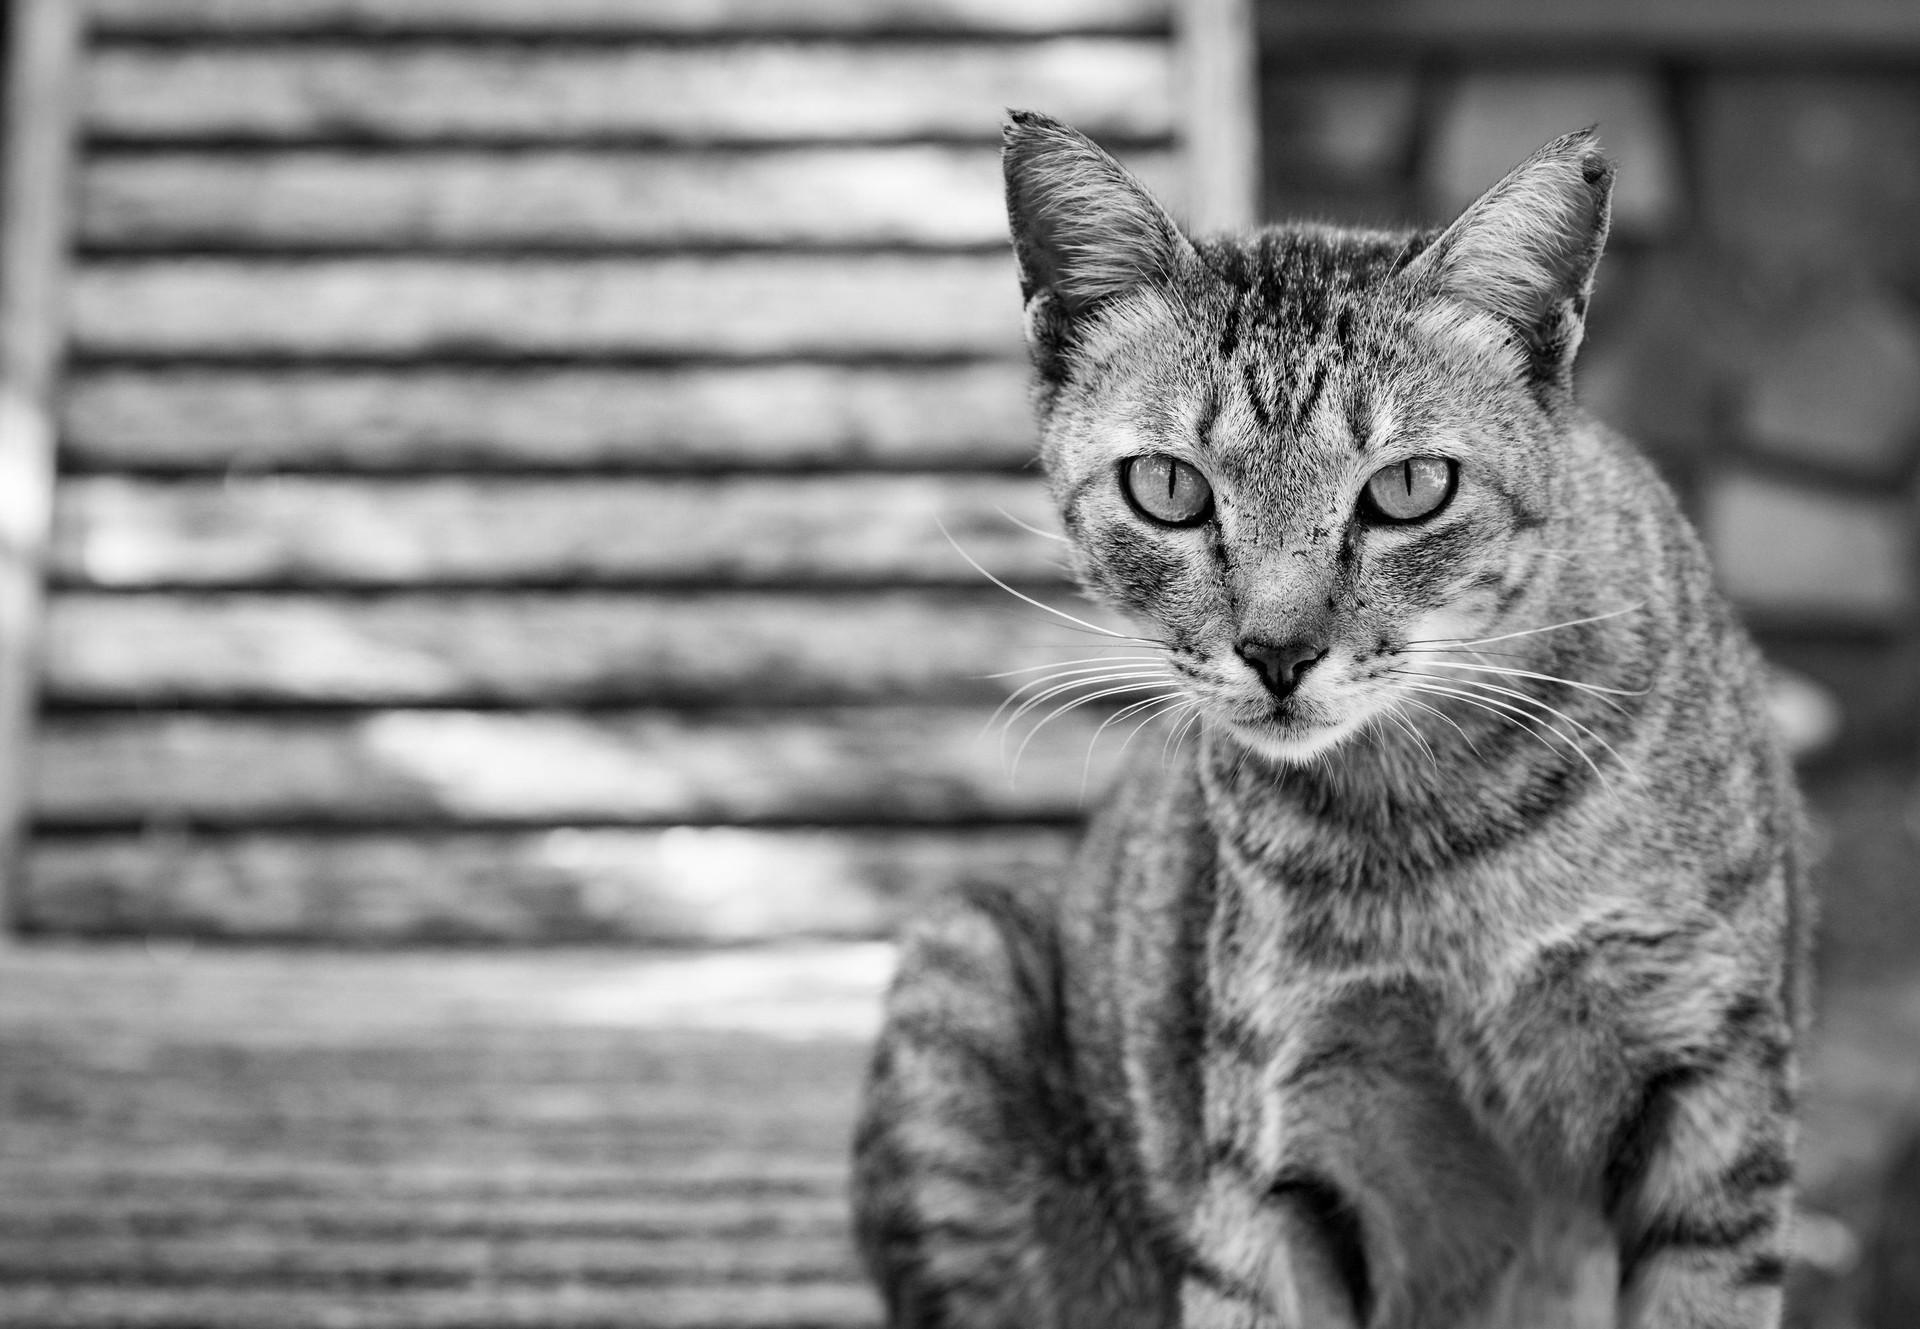

In [ ]:
image_3 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image_3)

In [ ]:
b = image_2.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image_2.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image_2.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0




In [ ]:
cv2_imshow(b)

In [ ]:
cv2_imshow(g)



In [ ]:
cv2_imshow(r)

In [ ]:
url = 'https://datacarpentry.org/image-processing/data/plant-seedling.jpg'

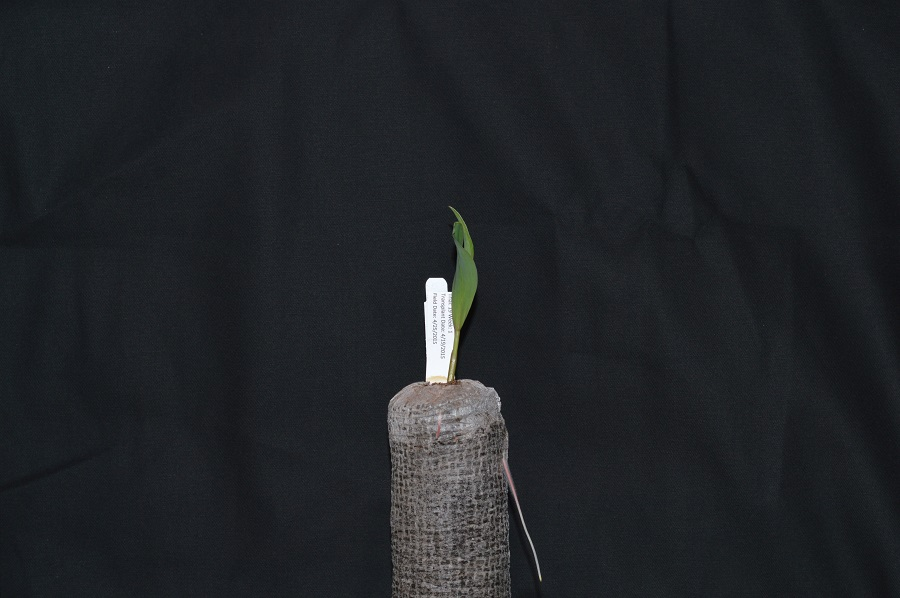

In [ ]:
image = io.imread(url)
image_4 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_4)

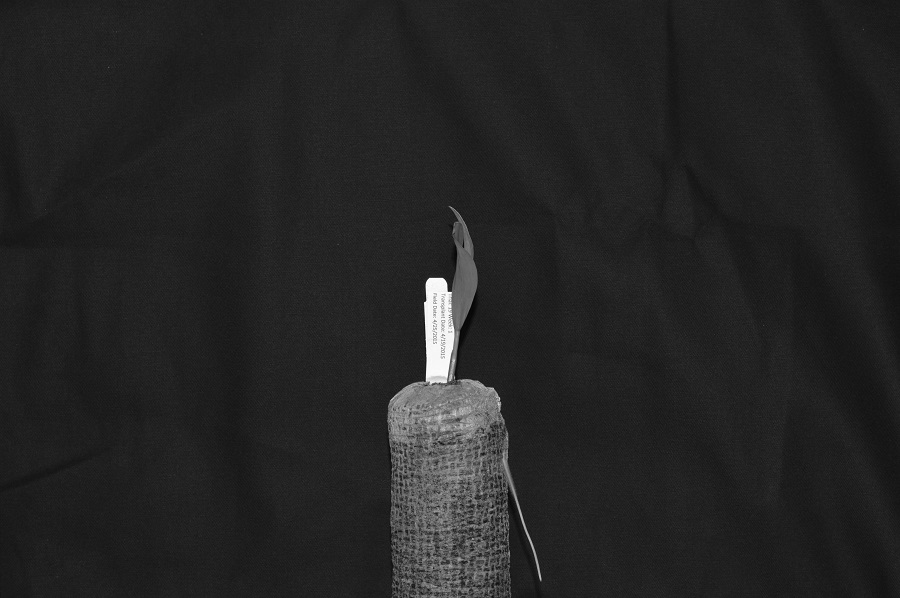

In [ ]:
image_4 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image_4)

<ipython-input-14-9fd9fc774d7f>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_4.ravel(), 256, [0, 256])


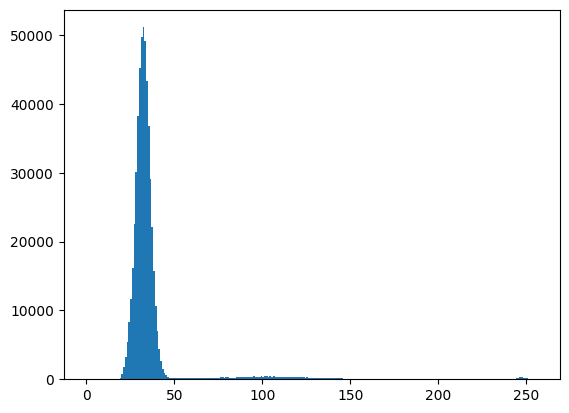

In [ ]:
plt.hist(image_4.ravel(), 256, [0, 256])
plt.show()

array([[26, 25, 22, ..., 25, 25, 25],
       [25, 25, 23, ..., 26, 25, 25],
       [25, 26, 25, ..., 27, 26, 25],
       ...,
       [21, 26, 27, ..., 30, 24, 32],
       [22, 26, 26, ..., 29, 24, 30],
       [23, 26, 25, ..., 23, 31, 24]], dtype=uint8)
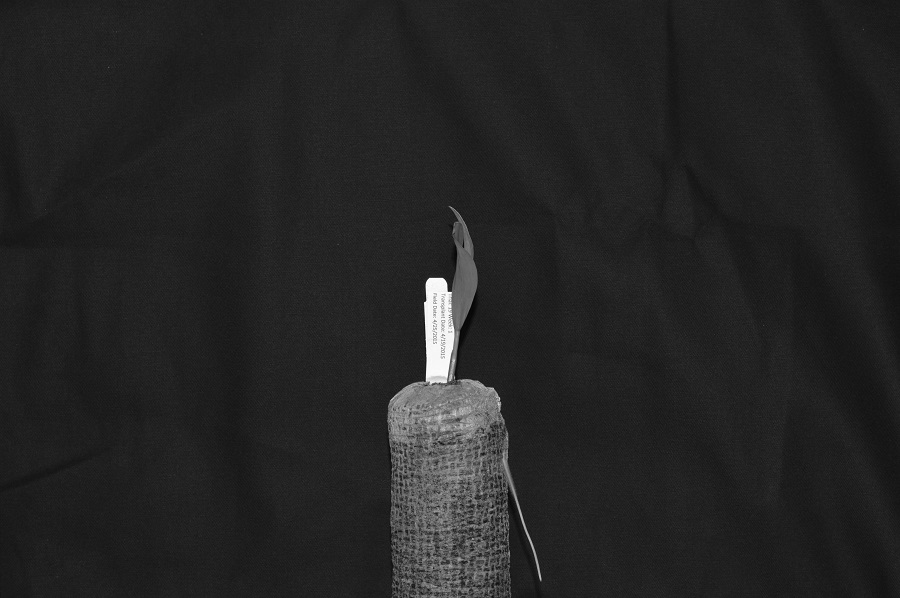

In [ ]:
image_4

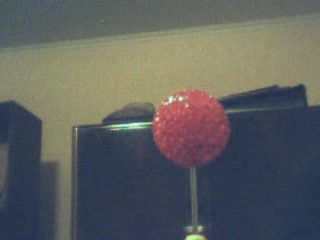

In [ ]:
url = 'http://mechanoid.su/content/cv-base.html/pix/ball2.jpg'
image = io.imread(url)
image_6 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_6)

In [ ]:
#autolevels
def autolevels(img):
  min = np.min(img)
  max = np.max(img)
  new_img = (img - min)/(255/(max-min))
  return new_img

In [ ]:
image_6_auto = autolevels(image_6)


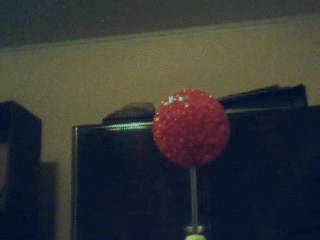

In [ ]:
cv2_imshow(image_6_auto)

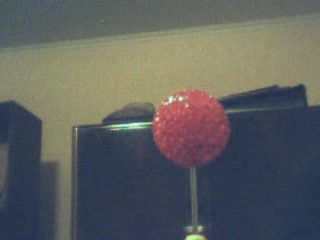

In [ ]:
image_6 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_6)

In [ ]:
image_6_auto = autolevels(image_6)

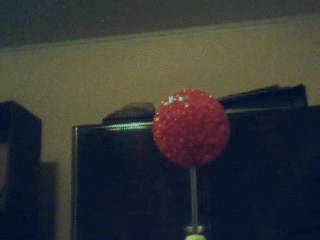

In [ ]:
cv2_imshow(image_6_auto)

In [ ]:
def gamma(img, gamma):
    return (img / 255.0) ** gamma * 255
gamma_img = gamma(image_6, 0.5)

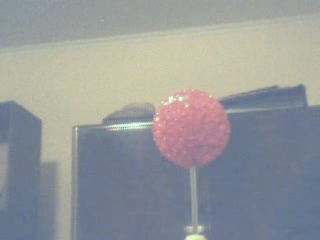

In [ ]:
cv2_imshow(gamma_img)

In [ ]:
gamma2 = gamma(image_6, 3)

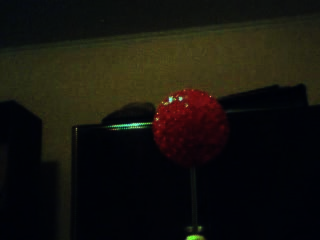

In [ ]:
cv2_imshow(gamma2)

With the use of open CV library make the next changes on the image
<br> + make binary image
<br> + blurring
<br> + edge detection (https://en.wikipedia.org/wiki/Edge_detection)
<bt> + image rotation
<br> + image scalling
<br> + 3 more options not listed in this notebook



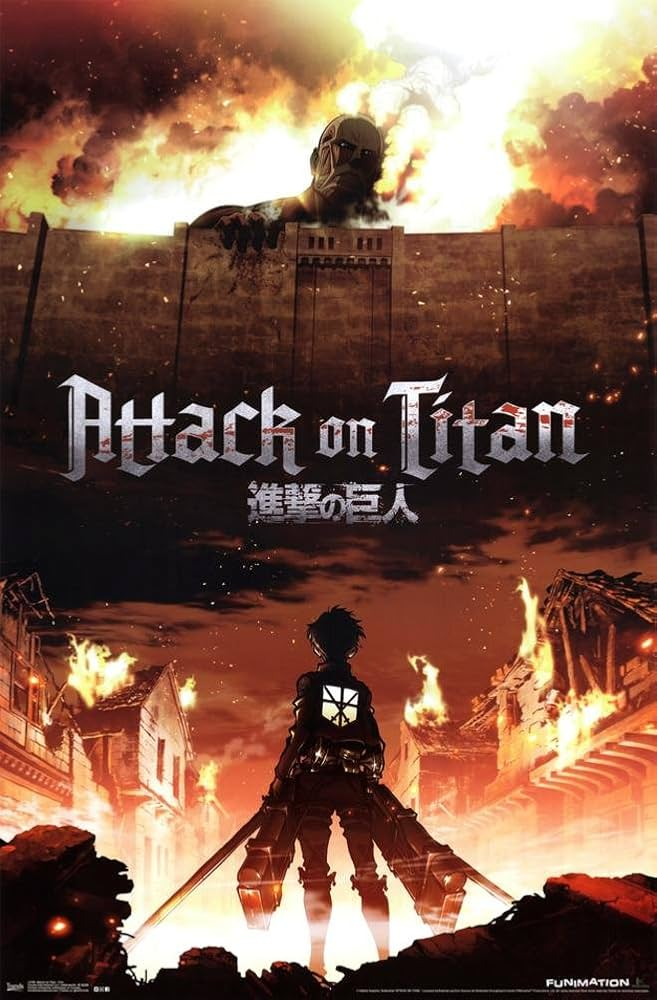

In [ ]:
url = 'https://m.media-amazon.com/images/I/61t9ie31jgL._AC_UF1000,1000_QL80_.jpg'
image = io.imread(url)
image_5 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_5 )

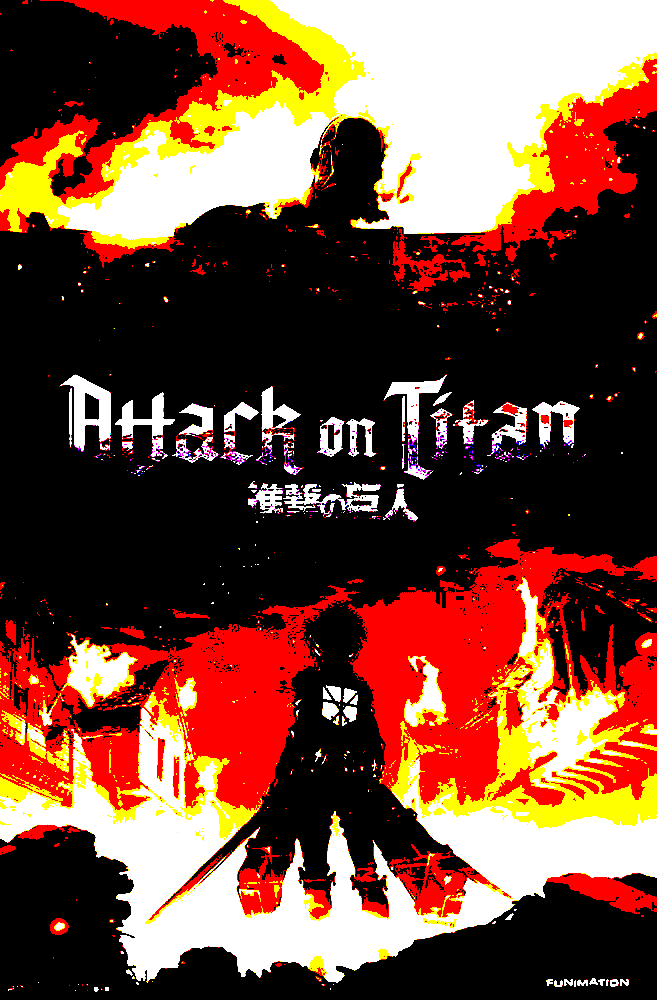

In [ ]:
# Apply binary thresholding
_, binary_image = cv.threshold(image_5, 128, 255, cv.THRESH_BINARY)

# Display the binary image
cv2_imshow(binary_image)

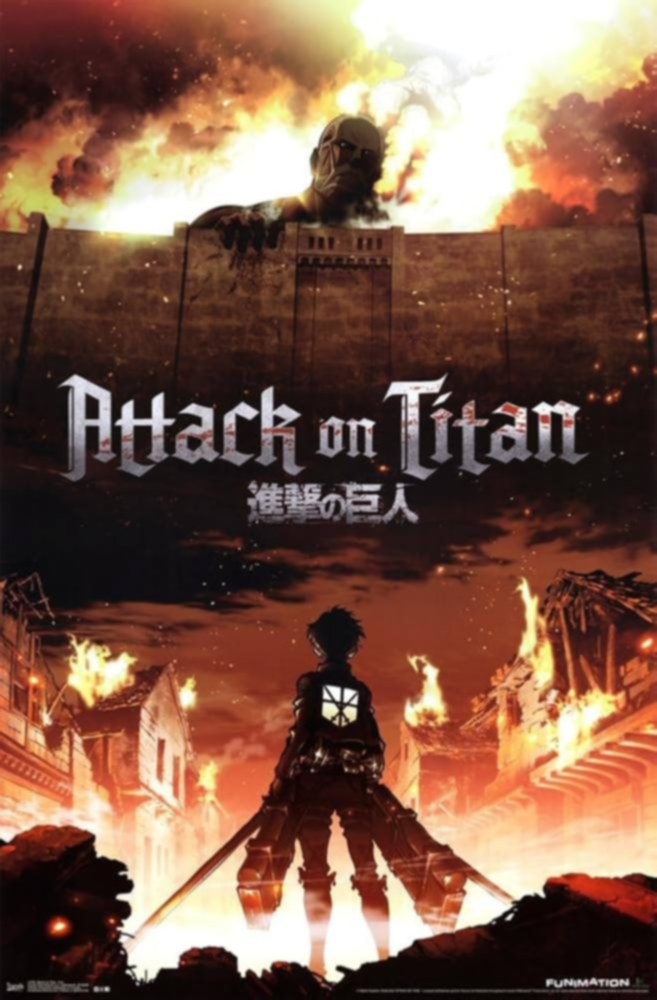

In [ ]:
blurred = cv.GaussianBlur(image_5, (5,5), 0)
cv2_imshow(blurred)


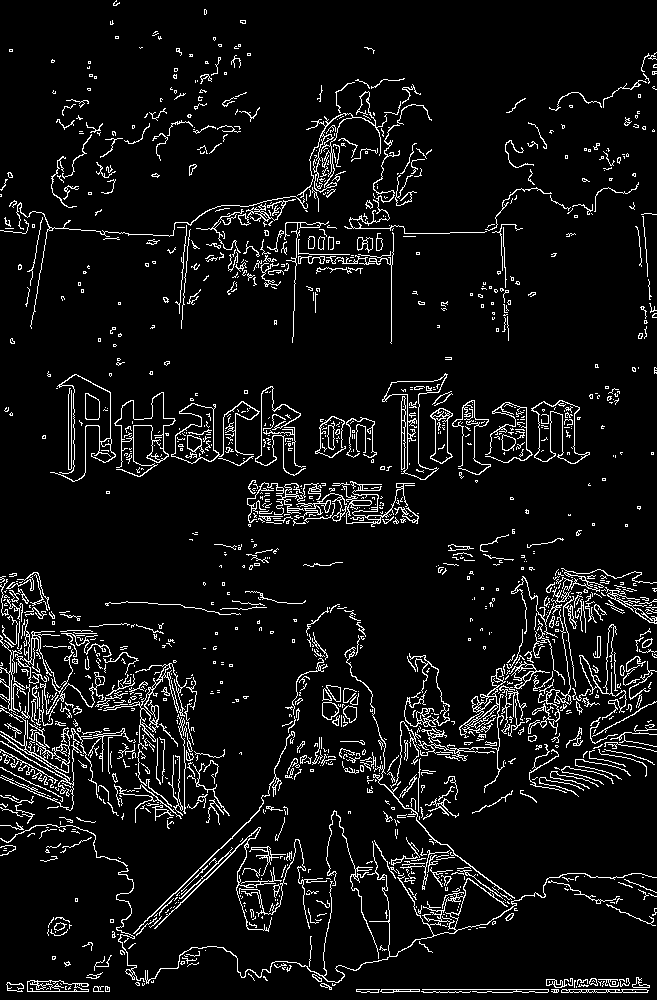

In [ ]:
edges = cv.Canny(image_5, 100, 200)
cv2_imshow(edges)


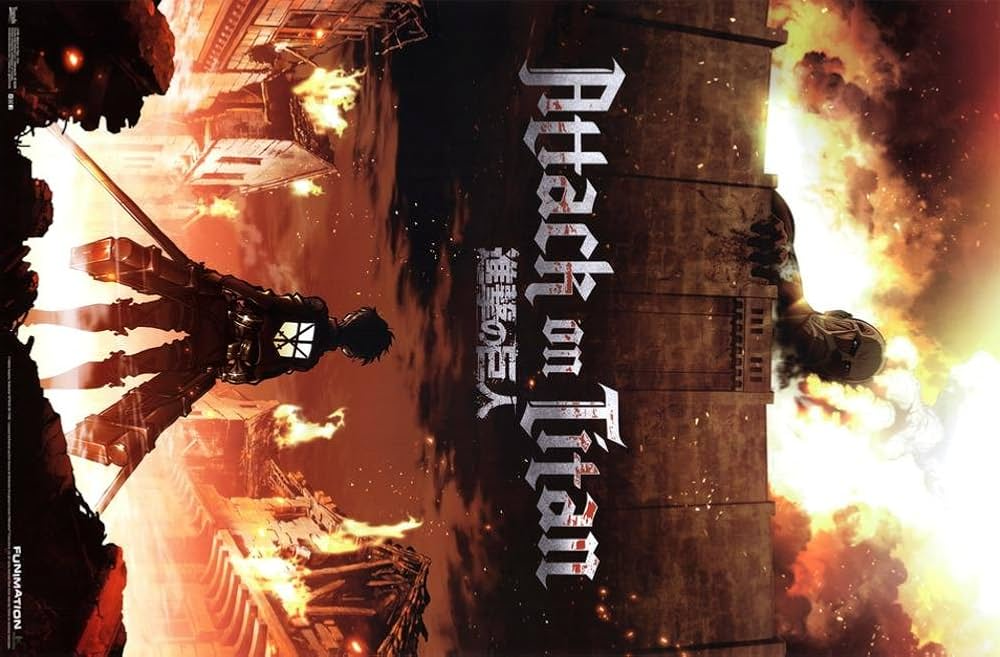

In [ ]:
rotated_90 = cv.rotate(image_5, cv.ROTATE_90_CLOCKWISE)
cv2_imshow(rotated_90)

In [ ]:
# Уменьшение изображения в 2 раза
scaled_down = cv.resize(image_5, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)

# Увеличение изображения в 2 раза
scaled_up = cv.resize(image_5, None, fx=2.0, fy=2.0, interpolation=cv.INTER_CUBIC)

cv2_imshow(scaled_down)
cv2_imshow(scaled_up)



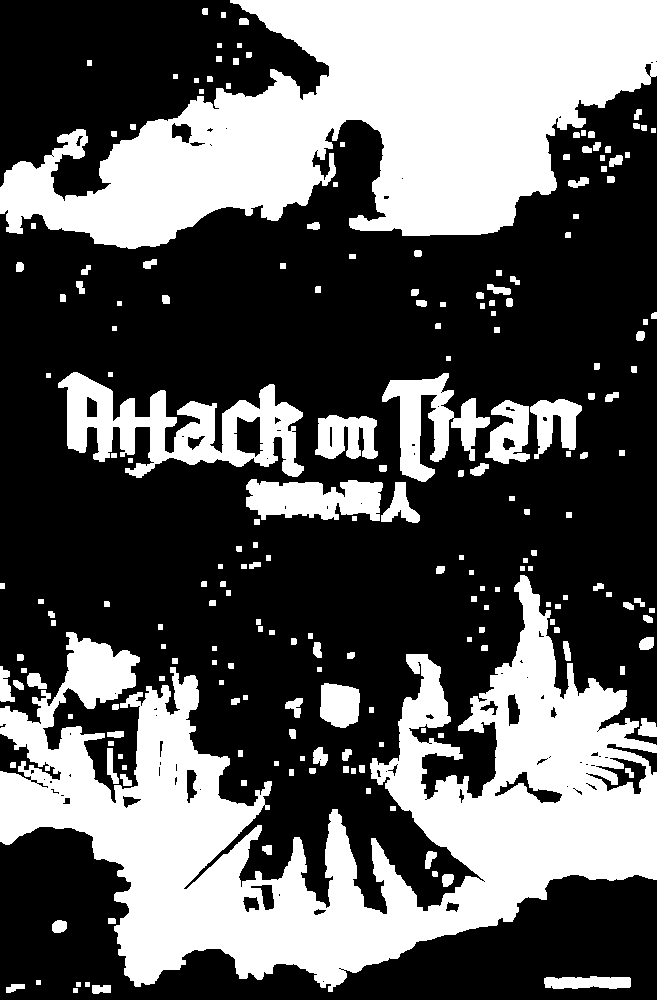

In [ ]:
# Преобразуем изображение в градации серого и бинаризуем
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, binary = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)
# Эрозия (уменьшает белые области)
# Применяем морфологическое расширение (Dilation)
kernel = np.ones((5,5), np.uint8)
dilated = cv.dilate(binary, kernel, iterations=1)

# Дилатация (расширяет белые области)
# Применяем морфологическое сужение (Erosion)
eroded = cv.erode(binary, kernel, iterations=1)

cv2_imshow(dilated)




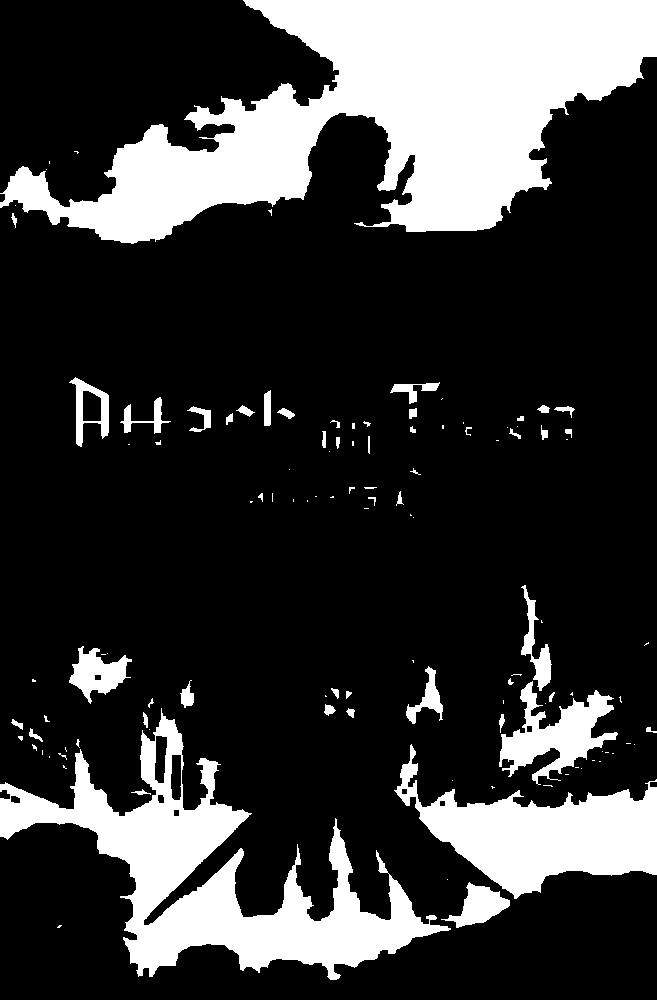

In [ ]:
cv2_imshow(eroded)

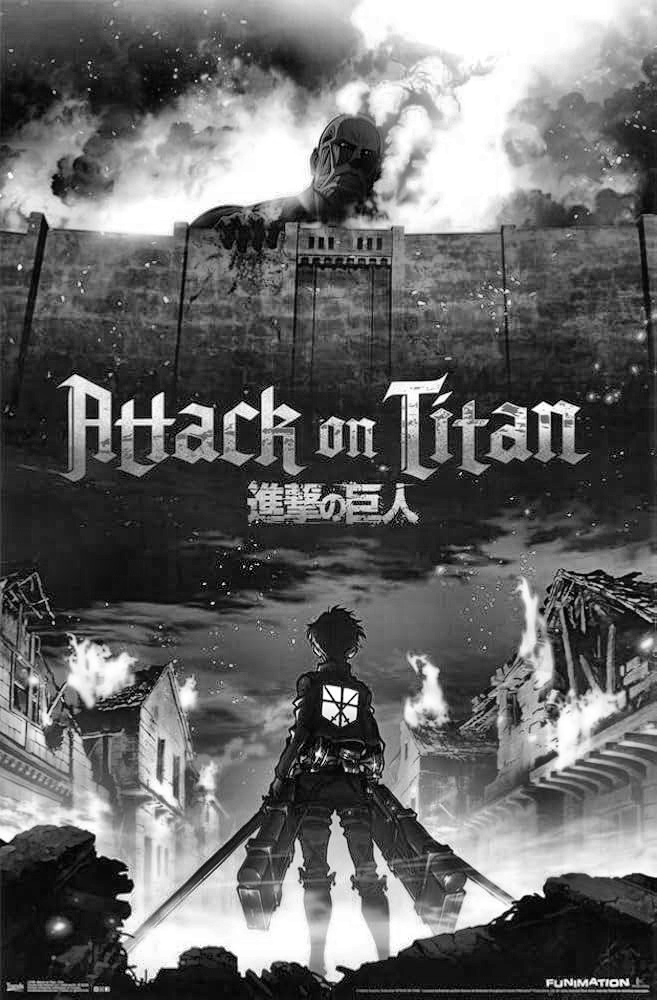

In [ ]:
# Преобразуем в градации серого
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Применяем адаптивное выравнивание гистограммы CLAHE
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

cv2_imshow(clahe_img)
